In [5]:
import re

import matplotlib.pyplot as plt
import pandas as pd
from openfast_toolbox.io import FASTOutputFile

In [6]:
of_outb_file = '../Verification/lc3.4_results/standalone_openfast.outb'
ahm_of_outb_file = '../Verification/lc3.4_results/ahm_openfast.outb'
ahm_md_out_file = '../Verification/lc3.4_results/ahm_moordyn.out'

In [7]:
iteration = slice(-60000, -1)

In [8]:
of_outb_df = FASTOutputFile(of_outb_file).toDataFrame()
of_outb_df = of_outb_df.rename(columns=lambda x: re.sub('_.*$', '', x))[-60000:]
ahm_of_out_df = FASTOutputFile(ahm_of_outb_file).toDataFrame()
ahm_md_out_df = pd.read_csv(ahm_md_out_file, sep='\s+', skiprows=[1], na_values=['***************'])
ahm_out_df = pd.concat([ahm_of_out_df, ahm_md_out_df], axis=1)
ahm_out_df = ahm_out_df.rename(columns=lambda x: re.sub('_.*$', '', x))[-60001:-1]
ahm_out_df = ahm_out_df.loc[:, ~ahm_out_df.columns.duplicated()]

In [9]:
t = of_outb_df['Time']

In [10]:
ahm_out_df

,Time,PtfmHeave,PtfmPitch,PtfmRoll,PtfmSurge,PtfmSway,PtfmYaw,FAIRTEN1,FAIRTEN2,FAIRTEN3,...,LINE1N1VZ,LINE2N1VX,LINE2N1VY,LINE2N1VZ,LINE3N1VX,LINE3N1VY,LINE3N1VZ,AnchTen1,AnchTen2,AnchTen3
6001,60.01,-5.642836,-0.057576,-0.001692,0.129430,0.015656,0.002119,9.723611e+06,9.714981e+06,9.714959e+06,...,-0.431577,0.631650,-0.023048,0.606141,0.618838,0.005080,0.611496,12345900.0,12351200.0,12353900.0
6002,60.02,-5.640095,-0.058398,-0.001699,0.128991,0.015635,0.002110,9.723679e+06,9.714727e+06,9.714703e+06,...,-0.431643,0.632143,-0.023094,0.605629,0.619323,0.004661,0.611409,12346000.0,12351400.0,12354100.0
6003,60.03,-5.637525,-0.059221,-0.001706,0.128552,0.015613,0.002101,9.723753e+06,9.714473e+06,9.714454e+06,...,-0.431777,0.632561,-0.023140,0.605118,0.619771,0.004242,0.611322,12346100.0,12351600.0,12354300.0
6004,60.04,-5.634784,-0.060027,-0.001713,0.128333,0.015591,0.002092,9.723815e+06,9.714219e+06,9.714205e+06,...,-0.431777,0.632979,-0.023187,0.604521,0.620219,0.003823,0.611235,12346100.0,12351800.0,12354500.0
6005,60.05,-5.632043,-0.060850,-0.001721,0.127894,0.015570,0.002084,9.723883e+06,9.713964e+06,9.713956e+06,...,-0.431777,0.633358,-0.023229,0.603924,0.620630,0.003405,0.611062,12346200.0,12352000.0,12354700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65996,659.96,-6.653606,-0.033590,0.000745,0.417476,-0.000603,-0.001012,9.728435e+06,9.726294e+06,9.726291e+06,...,-0.039018,-0.260380,-0.028877,0.070877,-0.261998,0.026956,0.071116,12323300.0,12285500.0,12287100.0
65997,659.97,-6.653092,-0.033719,0.000744,0.414185,-0.000607,-0.001014,9.728633e+06,9.726404e+06,9.726408e+06,...,-0.040618,-0.257304,-0.028898,0.074713,-0.258974,0.026876,0.075021,12323100.0,12285800.0,12287400.0
65998,659.98,-6.652407,-0.033864,0.000743,0.410675,-0.000611,-0.001016,9.728825e+06,9.726514e+06,9.726519e+06,...,-0.042218,-0.254229,-0.028914,0.078550,-0.255949,0.026794,0.078839,12322800.0,12286100.0,12287700.0
65999,659.99,-6.651893,-0.034009,0.000742,0.407385,-0.000614,-0.001018,9.729024e+06,9.726624e+06,9.726630e+06,...,-0.043819,-0.251153,-0.028931,0.082387,-0.252925,0.026710,0.082744,12322600.0,12286400.0,12288000.0


In [11]:
var_names = ['PtfmSurge', 'PtfmHeave', 'PtfmPitch', 'FairTen1', 'FairTen2', 'FairTen3', 'AnchTen1', 'AnchTen2', 'AnchTen3']

In [12]:
fig = plt.figure(figsize=(12, 12), tight_layout=True)
nrows = 3
ncols = 3
mooring_ylims = [0.75e7, 1.5e7]

<Figure size 1200x1200 with 0 Axes>

In [13]:
def plot_vars(of_data, ahm_data, t, fig, ax_idx, title, ylims):
    ax = fig.add_subplot(nrows, ncols, ax_idx+1)
    if ylims is not None:
        ax.set_ylim(ylims)
    ax.plot(t, of_data, color='black', label='OpenFAST')
    ax.plot(t, ahm_data, color='blue', label='AHM model')
    ax.set_title(title)
    return ax.get_legend_handles_labels()

In [14]:
for i, var_name in enumerate(var_names):
    if 'AnchTen' in var_name:
        of_var_name = var_name.upper()
        ahm_var_name = var_names[i-3].upper()
        ylims = mooring_ylims
    elif 'FairTen' in var_name:
        of_var_name = var_name.upper()
        ahm_var_name = var_names[i+3]
        ylims = mooring_ylims
    else:
        of_var_name = var_name
        ahm_var_name = var_name
        ylims = None
    handles, labels = plot_vars(of_outb_df[of_var_name],
                                ahm_out_df[ahm_var_name],
                                t, fig, i, var_name, ylims)
fig.legend(handles, labels, bbox_to_anchor=[0.63, -0.005, 0, 0], ncols=2, frameon=False)
fig.show()

C:\Users\mcdevin\AppData\Local\Temp\ipykernel_21488\1320941682.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


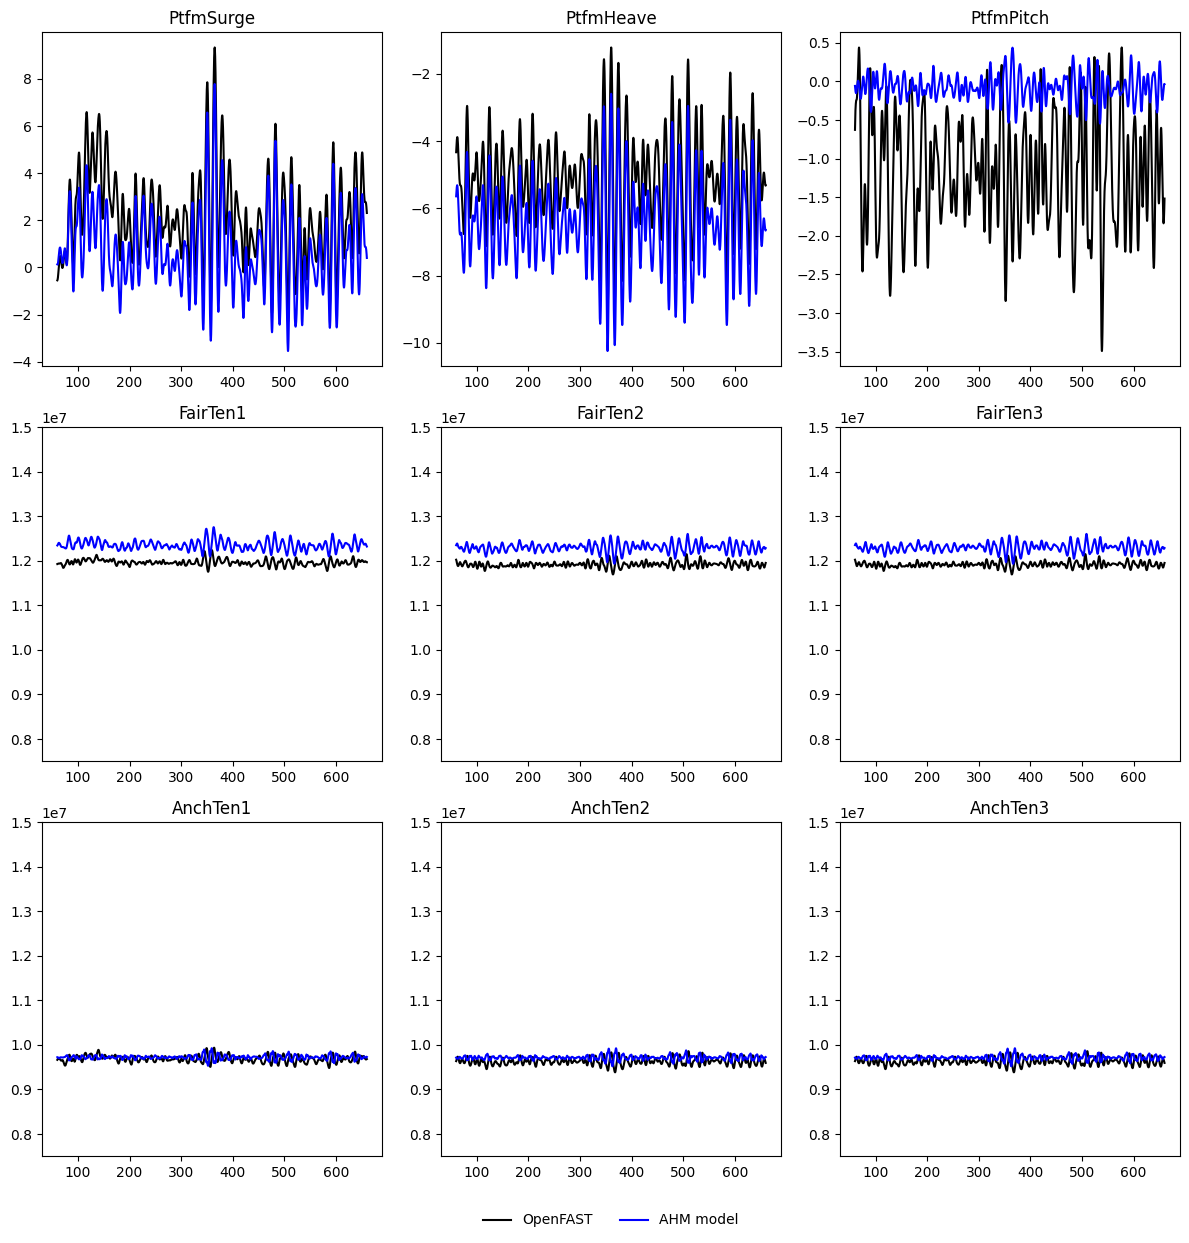

In [15]:
fig